In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

fli22=pd.read_csv('D:\\flights_weather2022.csv')
# fli_we22.head()

In [281]:
fli22.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


In [282]:
# flights_info = pd.DataFrame({
#     'Column': fli_we22.columns,
#     'DataType': fli_we22.dtypes.astype(str),
#     'MissingValues': fli_we22.isnull().sum(),
#     'UniqueValues': fli_we22.nunique()
# })
# weather_info = pd.DataFrame({
#     'Column': fli22.columns,
#     'DataType': fli22.dtypes.astype(str),
#     'MissingValues': fli22.isnull().sum(),
#     'UniqueValues': fli22.nunique()
# })
# print("Flight Dataset Info:")
# print(flights_info)

# print("\nFlight + Weather Dataset Info:")
# print(weather_info)


In [283]:
fli22.columns


Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'airline', 'route', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed',
       'wind_gust', 'precip', 'pressure', 'visib'],
      dtype='object')

In [284]:
numerical_cols = ['dep_delay', 'arr_delay', 'air_time', 'distance',
                  'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed',
                  'wind_gust', 'precip', 'pressure', 'visib']



In [285]:
correlation_matrix = fli22[numerical_cols].corr()


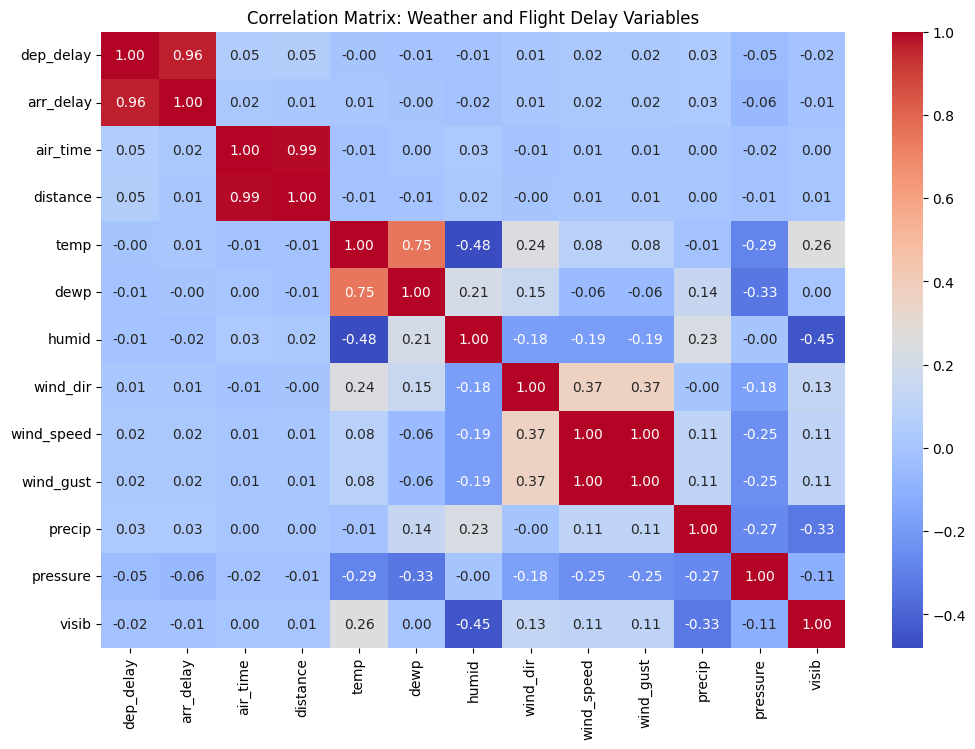

In [286]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Weather and Flight Delay Variables")
plt.show()


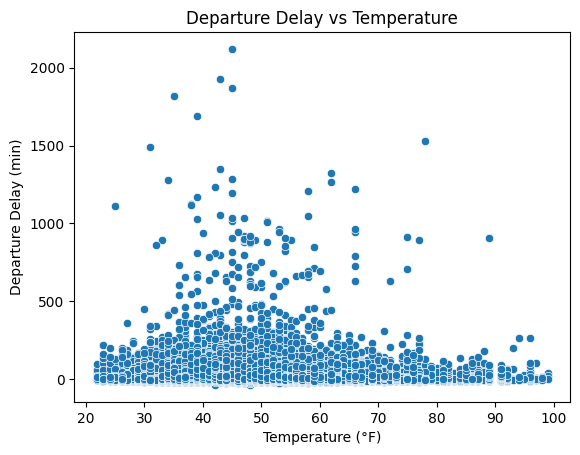

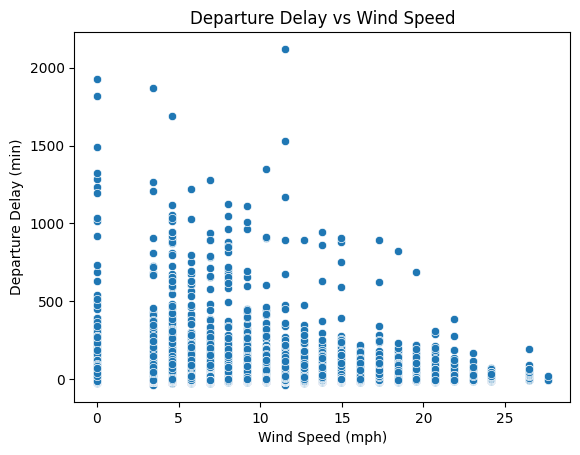

In [287]:
# Delay vs Temperatur
sns.scatterplot(data=fli22, x='temp', y='dep_delay')
plt.title('Departure Delay vs Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Departure Delay (min)')
plt.show()

# Delay vs Wind Speed
sns.scatterplot(data=fli22, x='wind_speed', y='dep_delay')
plt.title('Departure Delay vs Wind Speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Departure Delay (min)')
plt.show()


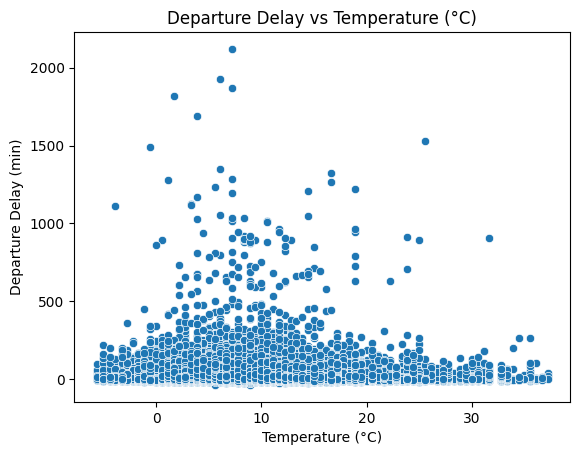

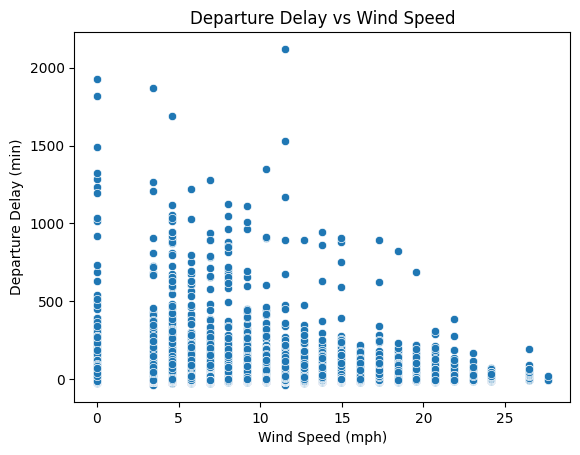

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a new column for Celsius temperature
fli22['temp_C'] = (fli22['temp'] - 32) * 5 / 9

# Plot: Departure Delay vs Temperature in Celsius
sns.scatterplot(data=fli22, x='temp_C', y='dep_delay')
plt.title('Departure Delay vs Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Departure Delay (min)')
plt.show()

# Plot: Departure Delay vs Wind Speed (unchanged, still in mph)
sns.scatterplot(data=fli22, x='wind_speed', y='dep_delay')
plt.title('Departure Delay vs Wind Speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Departure Delay (min)')
plt.show()


In [289]:
import numpy as np
from sklearn.model_selection import train_test_split
X = np.random.rand(100, 4)  
y = np.random.randint(0, 2, 100)  

# Now split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [290]:
fli22.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'airline', 'route', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed',
       'wind_gust', 'precip', 'pressure', 'visib', 'temp_C'],
      dtype='object')

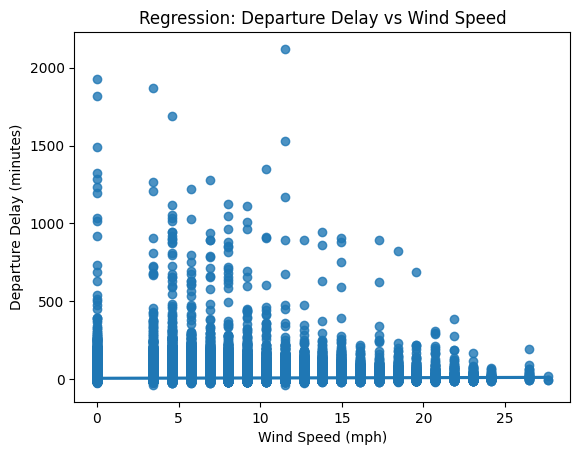

In [291]:
sns.regplot(x='wind_speed', y='dep_delay', data=fli22)
plt.title('Regression: Departure Delay vs Wind Speed')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Departure Delay (minutes)')
plt.show()


In [292]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [293]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, preds))
print("R²:", r2_score(y_test, preds))


MSE: 0.23665619868189447
R²: 0.013932505492106562


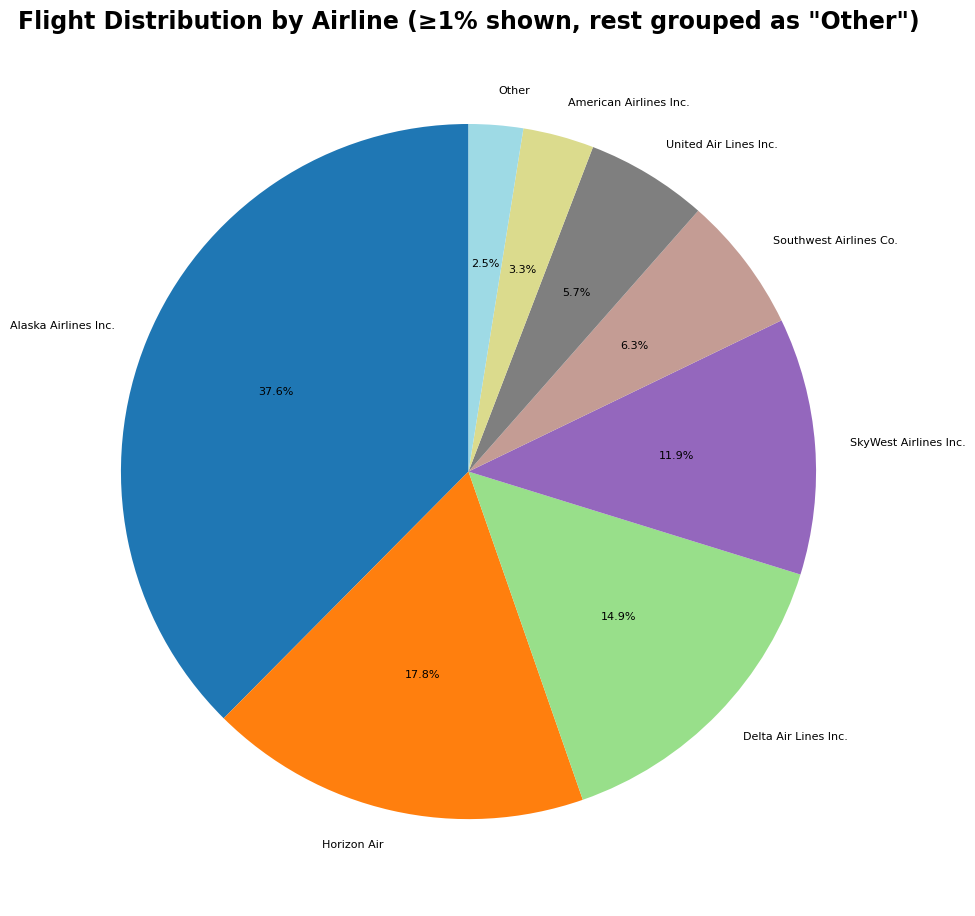

In [294]:
# Count flights per airline
airline_counts = fli22['airline'].value_counts(normalize=True) * 100  # Convert to percentage

# Threshold for grouping small percentages
threshold = 1  # 1%
large_airlines = airline_counts[airline_counts >= threshold]
small_airlines = airline_counts[airline_counts < threshold]

# Combine small values into "Other"
grouped_airlines = large_airlines.copy()
grouped_airlines['Other'] = small_airlines.sum()

# Plot
plt.figure(figsize=(10, 11))
grouped_airlines.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    cmap='tab20',
    textprops={'fontsize': 8}
)

plt.title('Flight Distribution by Airline (≥1% shown, rest grouped as "Other")', fontsize=17
          , fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_7772\3378719815.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='wind_speed_bin', y='dep_delay', data=fli22, ci=None, palette='Blues_d')
C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_7772\3378719815.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wind_speed_bin', y='dep_delay', data=fli22, ci=None, palette='Blues_d')


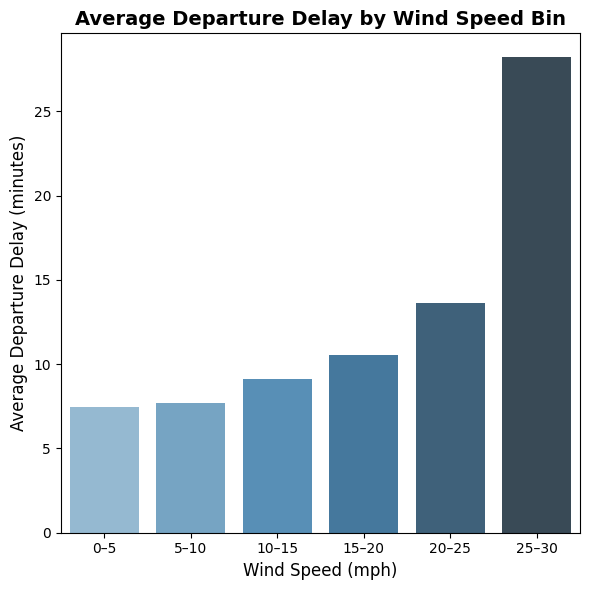

In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create bins for wind speed
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['0–5', '5–10', '10–15', '15–20', '20–25', '25–30']
fli22['wind_speed_bin'] = pd.cut(fli22['wind_speed'], bins=bins, labels=labels, include_lowest=True)

# Plot average departure delay per wind speed bin
plt.figure(figsize=(6, 6))
sns.barplot(x='wind_speed_bin', y='dep_delay', data=fli22, ci=None, palette='Blues_d')

plt.title('Average Departure Delay by Wind Speed Bin', fontsize=14, fontweight='bold')
plt.xlabel('Wind Speed (mph)', fontsize=12)
plt.ylabel('Average Departure Delay (minutes)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_7772\1678361279.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='wind_speed_bin', y='dep_delay', data=fli22, palette='Set3')


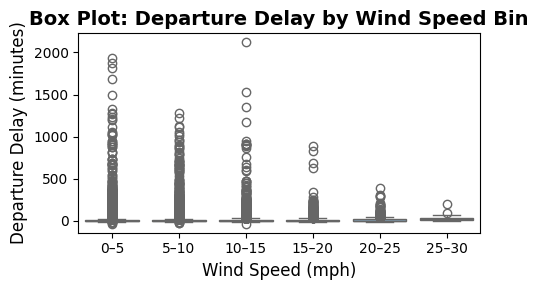

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named df
# Bin wind speed into categories
bins = [0, 5, 10, 15, 20, 25, 30]
labels = ['0–5', '5–10', '10–15', '15–20', '20–25', '25–30']
fli22['wind_speed_bin'] = pd.cut(fli22['wind_speed'], bins=bins, labels=labels, include_lowest=True)

# Create the box plot
plt.figure(figsize=(5, 3))
sns.boxplot(x='wind_speed_bin', y='dep_delay', data=fli22, palette='Set3')

plt.title('Box Plot: Departure Delay by Wind Speed Bin', fontsize=14, fontweight='bold')
plt.xlabel('Wind Speed (mph)', fontsize=12)
plt.ylabel('Departure Delay (minutes)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


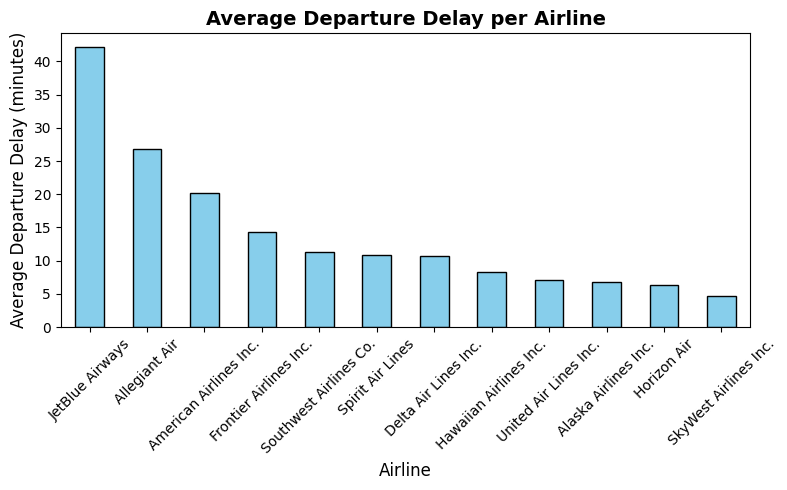

In [297]:
avg_dep_delay = fli22.groupby('airline')['dep_delay'].mean().sort_values(ascending=False)
avg_dep_delay = avg_dep_delay.dropna()


plt.figure(figsize=(8, 5))
avg_dep_delay.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Departure Delay per Airline', fontsize=14, fontweight='bold')
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Departure Delay (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


✅ **Top 3 Airlines with the Highest Average Departure Delays**

JetBlue Airways – **42.11** minutes

Allegiant Air – **26.77** minutes

American Airlines Inc. – **20.18** minutes

✅  **Top 3 Airlines with the Lowest Average Departure Delays**

SkyWest Airlines Inc. – **4.61** minutes

Horizon Air – **6.28** minutes

Alaska Airlines Inc. –  **6.75** minutes

✅ **Top 3 Airlines with the Highest Average Arrival Delays**

JetBlue Airways –: **31.38** minutes

Allegiant Air –: **22.22** minutes

Frontier Airlines Inc. –: **10.98** minutes

✅ **Top 3 Airlines with the Lowest Average Arrival Delays**

United Air Lines Inc.  **4.51** minutes (early arrivals on average)

SkyWest Airlines Inc. **0.54** minutes

Delta Air Lines Inc.  **0.91** minutes

<Figure size 500x400 with 0 Axes>

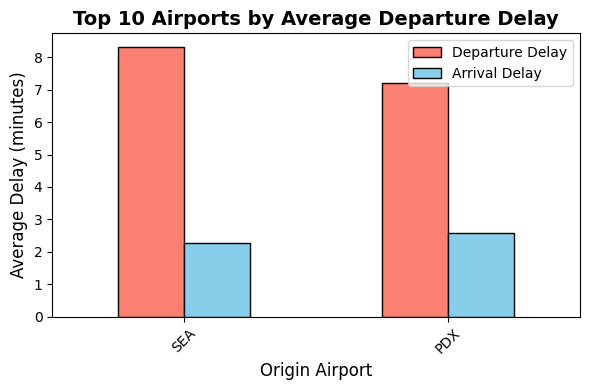

In [298]:
# 1. Calculate average departure and arrival delay by origin airport
origin_avg_delays = fli22.groupby('origin')[['dep_delay', 'arr_delay']].mean().sort_values(by='dep_delay', ascending=False)

# 2. Filter top 10 airports by average departure delay
top10_origin_delays = origin_avg_delays.head(10)

# 3. Plotting the delays
plt.figure(figsize=(5, 4))
top10_origin_delays[['dep_delay', 'arr_delay']].plot(kind='bar', figsize=(6, 4), color=['salmon', 'skyblue'], edgecolor='black')

plt.title('Top 10 Airports by Average Departure Delay', fontsize=14, fontweight='bold')
plt.xlabel('Origin Airport', fontsize=12)
plt.ylabel('Average Delay (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Departure Delay', 'Arrival Delay'])
plt.tight_layout()
plt.show()


In [299]:
df=fli22

In [300]:
df.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'airline', 'route', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed',
       'wind_gust', 'precip', 'pressure', 'visib', 'temp_C', 'wind_speed_bin'],
      dtype='object')

In [301]:
df['year'].shape

(111006,)

In [302]:
df['year'].value_counts()

year
2022    111006
Name: count, dtype: int64

In [303]:
df['dep_time'].head(100)

0       1.0
1       1.0
2      10.0
3      25.0
4      35.0
      ...  
95    825.0
96    827.0
97    831.0
98    835.0
99    837.0
Name: dep_time, Length: 100, dtype: float64

In [304]:
def convert_dep_time(value):
    value = int(value)
    hour = value // 100
    minute = value % 100

    # Handle 24:00 edge case
    if hour == 24 and minute == 0:
        hour = 0
        # Optional: move to next day, depending on your use case

    return pd.to_datetime(f'{hour:02d}:{minute:02d}', format='%H:%M').time()

In [305]:
df['arrival_time'] = df['arr_time'].dropna().apply(convert_dep_time)

In [306]:
df['arrival_time'].unique

<bound method Series.unique of 0         06:04:00
1         02:42:00
2         07:59:00
3         06:06:00
4         06:16:00
            ...   
111001         NaN
111002         NaN
111003         NaN
111004         NaN
111005         NaN
Name: arrival_time, Length: 111006, dtype: object>

In [307]:
df = df.rename(columns={'dep_time_clean': 'departure_time'})
df.head(20)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,temp_C,wind_speed_bin,arrival_time
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,0.555556,5–10,06:04:00
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0,0.000000,5–10,02:42:00
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,0.555556,5–10,07:59:00
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,0.555556,5–10,06:06:00
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0,0.555556,5–10,06:16:00
5,2022,1,1,51.0,2352,59.0,840.0,758,42.0,B6,...,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0,0.555556,5–10,08:40:00
6,2022,1,1,104.0,43,21.0,936.0,930,6.0,AA,...,62.50,350.0,8.05546,9.270062,0.0,1020.7,10.0,-3.888889,5–10,09:36:00
7,2022,1,1,131.0,2251,160.0,216.0,2347,149.0,QX,...,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0,0.000000,5–10,02:16:00
8,2022,1,1,142.0,2305,157.0,900.0,657,123.0,UA,...,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,0.555556,5–10,09:00:00
9,2022,1,1,255.0,2355,180.0,831.0,549,162.0,UA,...,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,0.555556,5–10,08:31:00


In [308]:
df['arr_time'].head(10)

0    604.0
1    242.0
2    759.0
3    606.0
4    616.0
5    840.0
6    936.0
7    216.0
8    900.0
9    831.0
Name: arr_time, dtype: float64

In [309]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,temp_C,wind_speed_bin,arrival_time
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,0.555556,5–10,06:04:00
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0,0.000000,5–10,02:42:00
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,0.555556,5–10,07:59:00
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,0.555556,5–10,06:06:00
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0,0.555556,5–10,06:16:00


In [310]:
df.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'airline', 'route', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed',
       'wind_gust', 'precip', 'pressure', 'visib', 'temp_C', 'wind_speed_bin',
       'arrival_time'],
      dtype='object')

In [311]:
# Convert year, month, day to full date
df['flight_date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Format HHMM times to datetime by combining with flight_date
def convert_time(df, date_col, time_col, new_col_name):
   df[time_col]=df[time_col].astype(str).str.zfill(4) # ensure 4 digits time formate
   df[new_col_name]=pd.to_datetime(
      df[date_col].dt.strftime('%Y-%m-%d') + ' ' + df[time_col].str.slice(0,2) + ':'+ df[time_col].str.slice(2,4),
      format='%Y-%m-%d %H:%M:%S',
      errors ='coerce'
   ) 
   return df

# Apply to departure and arrival 
df=convert_time(df,'flight_date','dep_time','dep_datetime')
df=convert_time(df,'flight_date','sched_dep_time','sched_dep_datetime')
df=convert_time(df,'flight_date','arr_time','arr_datetime')
df=convert_time(df,'flight_date','sched_arr_time','sched_arr_datetime')



In [312]:
df.head(20)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,pressure,visib,temp_C,wind_speed_bin,arrival_time,flight_date,dep_datetime,sched_dep_datetime,arr_datetime,sched_arr_datetime
0,2022,1,1,01.0,2359,2.0,604.0,0618,-14.0,UA,...,1022.9,10.0,0.555556,5–10,06:04:00,2022-01-01,NaT,NaT,NaT,NaT
1,2022,1,1,01.0,2250,71.0,242.0,0142,60.0,AS,...,1023.4,10.0,0.000000,5–10,02:42:00,2022-01-01,NaT,NaT,NaT,NaT
2,2022,1,1,10.0,2355,15.0,759.0,0730,29.0,AS,...,1022.9,10.0,0.555556,5–10,07:59:00,2022-01-01,NaT,NaT,NaT,NaT
3,2022,1,1,25.0,2350,35.0,606.0,0550,16.0,AS,...,1022.9,10.0,0.555556,5–10,06:06:00,2022-01-01,NaT,NaT,NaT,NaT
4,2022,1,1,35.0,2349,46.0,616.0,0545,31.0,UA,...,1025.1,10.0,0.555556,5–10,06:16:00,2022-01-01,NaT,NaT,NaT,NaT
5,2022,1,1,51.0,2352,59.0,840.0,0758,42.0,B6,...,1025.1,10.0,0.555556,5–10,08:40:00,2022-01-01,NaT,NaT,NaT,NaT
6,2022,1,1,104.0,0043,21.0,936.0,0930,6.0,AA,...,1020.7,10.0,-3.888889,5–10,09:36:00,2022-01-01,NaT,NaT,NaT,NaT
7,2022,1,1,131.0,2251,160.0,216.0,2347,149.0,QX,...,1023.4,10.0,0.000000,5–10,02:16:00,2022-01-01,NaT,NaT,NaT,NaT
8,2022,1,1,142.0,2305,157.0,900.0,0657,123.0,UA,...,1022.9,10.0,0.555556,5–10,09:00:00,2022-01-01,NaT,NaT,NaT,NaT
9,2022,1,1,255.0,2355,180.0,831.0,0549,162.0,UA,...,1022.9,10.0,0.555556,5–10,08:31:00,2022-01-01,NaT,NaT,NaT,NaT


In [313]:
df['dep_datetime'].values


array(['NaT', 'NaT', 'NaT', ..., 'NaT', 'NaT', 'NaT'],
      dtype='datetime64[ns]')

In [314]:
# Ensure the 'year', 'month', and 'day' columns are numeric
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)

# Create a new 'date' column by combining the three columns
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [315]:

# df['formatted_date'] = df['date'].dt.strftime('%Y-%m-%d')
# df = df.dropna(subset=['date']) # Nat Not a time

In [316]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,visib,temp_C,wind_speed_bin,arrival_time,flight_date,dep_datetime,sched_dep_datetime,arr_datetime,sched_arr_datetime,date
0,2022,1,1,01.0,2359,2.0,604.0,0618,-14.0,UA,...,10.0,0.555556,5–10,06:04:00,2022-01-01,NaT,NaT,NaT,NaT,2022-01-01
1,2022,1,1,01.0,2250,71.0,242.0,0142,60.0,AS,...,10.0,0.000000,5–10,02:42:00,2022-01-01,NaT,NaT,NaT,NaT,2022-01-01
2,2022,1,1,10.0,2355,15.0,759.0,0730,29.0,AS,...,10.0,0.555556,5–10,07:59:00,2022-01-01,NaT,NaT,NaT,NaT,2022-01-01
3,2022,1,1,25.0,2350,35.0,606.0,0550,16.0,AS,...,10.0,0.555556,5–10,06:06:00,2022-01-01,NaT,NaT,NaT,NaT,2022-01-01
4,2022,1,1,35.0,2349,46.0,616.0,0545,31.0,UA,...,10.0,0.555556,5–10,06:16:00,2022-01-01,NaT,NaT,NaT,NaT,2022-01-01


### remove the NaT colums


In [317]:
# Drop raw time columns if no longer needed
df.drop(columns=['dep_datetime', 'sched_dep_datetime', 'arr_datetime', 'sched_arr_datetime'], inplace=True)

In [318]:
# df.drop(columns=['formatted_date', 'date'], inplace=True)


In [319]:
df.drop(columns=['year', 'month','day'], inplace=True)


In [320]:
df.head(2)

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,...,wind_speed,wind_gust,precip,pressure,visib,temp_C,wind_speed_bin,arrival_time,flight_date,date
0,01.0,2359,2.0,604.0,0618,-14.0,UA,555,N405UA,SEA,...,8.05546,9.270062,0.0,1022.9,10.0,0.555556,5–10,06:04:00,2022-01-01,2022-01-01
1,01.0,2250,71.0,242.0,0142,60.0,AS,72,N265AK,SEA,...,9.20624,10.594357,0.0,1023.4,10.0,0.000000,5–10,02:42:00,2022-01-01,2022-01-01


In [321]:
df.shape

(111006, 31)

In [322]:
df.columns

Index(['dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time',
       'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute', 'airline', 'route', 'temp',
       'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip',
       'pressure', 'visib', 'temp_C', 'wind_speed_bin', 'arrival_time',
       'flight_date', 'date'],
      dtype='object')

In [323]:
df['temperature_c'] = (df['temp_C'] - 32) * 5.0 / 9.0

In [324]:
df.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,...,wind_gust,precip,pressure,visib,temp_C,wind_speed_bin,arrival_time,flight_date,date,temperature_c
0,01.0,2359,2.0,604.0,0618,-14.0,UA,555,N405UA,SEA,...,9.270062,0.0,1022.9,10.0,0.555556,5–10,06:04:00,2022-01-01,2022-01-01,-17.469136
1,01.0,2250,71.0,242.0,0142,60.0,AS,72,N265AK,SEA,...,10.594357,0.0,1023.4,10.0,0.000000,5–10,02:42:00,2022-01-01,2022-01-01,-17.777778
2,10.0,2355,15.0,759.0,0730,29.0,AS,270,N274AK,SEA,...,9.270062,0.0,1022.9,10.0,0.555556,5–10,07:59:00,2022-01-01,2022-01-01,-17.469136
3,25.0,2350,35.0,606.0,0550,16.0,AS,7,N281AK,SEA,...,9.270062,0.0,1022.9,10.0,0.555556,5–10,06:06:00,2022-01-01,2022-01-01,-17.469136
4,35.0,2349,46.0,616.0,0545,31.0,UA,507,N426UA,PDX,...,7.945768,0.0,1025.1,10.0,0.555556,5–10,06:16:00,2022-01-01,2022-01-01,-17.469136


## 🌬️ Step 5: Wind Speed Binning

In [325]:
# create wind speed categories
df['wind_speed_mph']=pd.cut(
    df['wind_speed'],
    bins=[-1,5,15,25,35,100],
    labels=['Calm','Breeze','Moderate','Strong','Severe']
)

## 🌧️ Step 6: Weather Severity Scoring (Optional Feature)
- ##### You can build a simple weather severity score by combining extreme values:

In [326]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Scale the selected weather columns
scaler = MinMaxScaler()

df[['wind_speed_normal', 'humidity_normal', 'precipitation_normal']] = scaler.fit_transform(
    df[['wind_speed', 'humid', 'precip']]
)
# Step 2: Create a composite "weather severity" score
df['weather_severity'] = (
    0.4 * df['wind_speed_normal'] +
    0.3 * df['humidity_normal'] +
    0.3 * df['precipitation_normal']
)

In [327]:
df['humidity_percent'] = (df['humidity_normal'] * 100).round(0).astype(int).astype(str) + '%'


In [328]:
df.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,...,arrival_time,flight_date,date,temperature_c,wind_speed_mph,wind_speed_normal,humidity_normal,precipitation_normal,weather_severity,humidity_percent
0,01.0,2359,2.0,604.0,0618,-14.0,UA,555,N405UA,SEA,...,06:04:00,2022-01-01,2022-01-01,-17.469136,Breeze,0.291667,0.596960,0.0,0.295755,60%
1,01.0,2250,71.0,242.0,0142,60.0,AS,72,N265AK,SEA,...,02:42:00,2022-01-01,2022-01-01,-17.777778,Breeze,0.333333,0.632348,0.0,0.323038,63%
2,10.0,2355,15.0,759.0,0730,29.0,AS,270,N274AK,SEA,...,07:59:00,2022-01-01,2022-01-01,-17.469136,Breeze,0.291667,0.596960,0.0,0.295755,60%
3,25.0,2350,35.0,606.0,0550,16.0,AS,7,N281AK,SEA,...,06:06:00,2022-01-01,2022-01-01,-17.469136,Breeze,0.291667,0.596960,0.0,0.295755,60%
4,35.0,2349,46.0,616.0,0545,31.0,UA,507,N426UA,PDX,...,06:16:00,2022-01-01,2022-01-01,-17.469136,Breeze,0.250000,0.474528,0.0,0.242358,47%


In [329]:
df['precipitation_normal'].values

array([0., 0., 0., ..., 0., 0., 0.])

In [330]:
df.drop(columns=['precipitation_normal', 'humidity_normal'], inplace=True)


In [331]:
df['temperature_c'].values

array([-17.4691358 , -17.77777778, -17.4691358 , ...,  -7.59259259,
       -10.37037037, -10.37037037])

In [332]:
df['temperature_c'] = df['temperature_c'].round(1).astype(str) + '°C'

In [333]:
# Bucket weather_severity into labeled categories
bins = [0.0, 0.29, 0.69, 1.0]
labels = ['Mild', 'Moderate', 'Severe']

df['weather_severity_level'] = pd.cut(df['weather_severity'], bins=bins, labels=labels, include_lowest=True)

In [334]:
df.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,...,wind_speed_bin,arrival_time,flight_date,date,temperature_c,wind_speed_mph,wind_speed_normal,weather_severity,humidity_percent,weather_severity_level
0,01.0,2359,2.0,604.0,0618,-14.0,UA,555,N405UA,SEA,...,5–10,06:04:00,2022-01-01,2022-01-01,-17.5°C,Breeze,0.291667,0.295755,60%,Moderate
1,01.0,2250,71.0,242.0,0142,60.0,AS,72,N265AK,SEA,...,5–10,02:42:00,2022-01-01,2022-01-01,-17.8°C,Breeze,0.333333,0.323038,63%,Moderate
2,10.0,2355,15.0,759.0,0730,29.0,AS,270,N274AK,SEA,...,5–10,07:59:00,2022-01-01,2022-01-01,-17.5°C,Breeze,0.291667,0.295755,60%,Moderate
3,25.0,2350,35.0,606.0,0550,16.0,AS,7,N281AK,SEA,...,5–10,06:06:00,2022-01-01,2022-01-01,-17.5°C,Breeze,0.291667,0.295755,60%,Moderate
4,35.0,2349,46.0,616.0,0545,31.0,UA,507,N426UA,PDX,...,5–10,06:16:00,2022-01-01,2022-01-01,-17.5°C,Breeze,0.250000,0.242358,47%,Mild


In [335]:
print(df['weather_severity'].describe())

count    110727.000000
mean          0.323220
std           0.084098
min           0.031778
25%           0.268080
50%           0.317789
75%           0.371451
max           0.785159
Name: weather_severity, dtype: float64


In [336]:
print(df['weather_severity'].isna().sum())

279


In [337]:
df.dropna(subset=['weather_severity', 'wind_speed_normal'], inplace=True)

In [338]:
bins = [0.0, 0.29, 0.69, 1.0]
labels = ['Mild', 'Moderate', 'Severe']

df['weather_severity_level'] = pd.cut(
    df['weather_severity'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

In [339]:
df.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,...,wind_speed_bin,arrival_time,flight_date,date,temperature_c,wind_speed_mph,wind_speed_normal,weather_severity,humidity_percent,weather_severity_level
0,01.0,2359,2.0,604.0,0618,-14.0,UA,555,N405UA,SEA,...,5–10,06:04:00,2022-01-01,2022-01-01,-17.5°C,Breeze,0.291667,0.295755,60%,Moderate
1,01.0,2250,71.0,242.0,0142,60.0,AS,72,N265AK,SEA,...,5–10,02:42:00,2022-01-01,2022-01-01,-17.8°C,Breeze,0.333333,0.323038,63%,Moderate
2,10.0,2355,15.0,759.0,0730,29.0,AS,270,N274AK,SEA,...,5–10,07:59:00,2022-01-01,2022-01-01,-17.5°C,Breeze,0.291667,0.295755,60%,Moderate
3,25.0,2350,35.0,606.0,0550,16.0,AS,7,N281AK,SEA,...,5–10,06:06:00,2022-01-01,2022-01-01,-17.5°C,Breeze,0.291667,0.295755,60%,Moderate
4,35.0,2349,46.0,616.0,0545,31.0,UA,507,N426UA,PDX,...,5–10,06:16:00,2022-01-01,2022-01-01,-17.5°C,Breeze,0.250000,0.242358,47%,Mild


In [340]:
df.dropna(subset=['weather_severity'], inplace=True)

In [341]:
df['arr_delay'].values

array([-14.,  60.,  29., ...,  nan,  nan,  nan])

In [342]:
df['arr_delay'] = df['arr_delay'].fillna(df['arr_delay'].mean())

In [343]:
df['arr_delay'].values

array([-14.        ,  60.        ,  29.        , ...,   2.34791179,
         2.34791179,   2.34791179])

In [344]:
def label_delay(x):
    if x<=0:
        return 'On Time'
    elif x<=30:
        return 'Slightly Late'
    else:
        return 'Very Late'
df['arrival_status']=df['arr_delay'].apply(label_delay)

In [345]:
df.head(2)

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,...,arrival_time,flight_date,date,temperature_c,wind_speed_mph,wind_speed_normal,weather_severity,humidity_percent,weather_severity_level,arrival_status
0,01.0,2359,2.0,604.0,0618,-14.0,UA,555,N405UA,SEA,...,06:04:00,2022-01-01,2022-01-01,-17.5°C,Breeze,0.291667,0.295755,60%,Moderate,On Time
1,01.0,2250,71.0,242.0,0142,60.0,AS,72,N265AK,SEA,...,02:42:00,2022-01-01,2022-01-01,-17.8°C,Breeze,0.333333,0.323038,63%,Moderate,Very Late


In [346]:
df['sched_arr_time'].values

array(['0618', '0142', '0730', ..., '2352', '2029', '1544'], dtype=object)

In [347]:
df['sched_arr_time']= pd.to_datetime(df['sched_arr_time'],format='%H%M%S').dt.time

In [348]:
# Extract hoir
df['sched_arr_hour']=pd.to_datetime(df['sched_arr_time'].astype(str)).dt.hour

# create time-of-day labels

def label_period(hour):
    if 5 <= hour <12:
        return 'Morning'
    elif 12 <= hour < 17:
        return ' Afternoon '
    elif 17<=hour <21:
        return ' Evening '
    else:
        return 'nights'
df['arrival_period']=df['sched_arr_hour'].apply(label_period)

C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_7772\1996783012.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sched_arr_hour']=pd.to_datetime(df['sched_arr_time'].astype(str)).dt.hour


In [349]:
df.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,...,date,temperature_c,wind_speed_mph,wind_speed_normal,weather_severity,humidity_percent,weather_severity_level,arrival_status,sched_arr_hour,arrival_period
0,01.0,2359,2.0,604.0,06:01:08,-14.0,UA,555,N405UA,SEA,...,2022-01-01,-17.5°C,Breeze,0.291667,0.295755,60%,Moderate,On Time,6,Morning
1,01.0,2250,71.0,242.0,01:04:02,60.0,AS,72,N265AK,SEA,...,2022-01-01,-17.8°C,Breeze,0.333333,0.323038,63%,Moderate,Very Late,1,nights
2,10.0,2355,15.0,759.0,07:03:00,29.0,AS,270,N274AK,SEA,...,2022-01-01,-17.5°C,Breeze,0.291667,0.295755,60%,Moderate,Slightly Late,7,Morning
3,25.0,2350,35.0,606.0,05:05:00,16.0,AS,7,N281AK,SEA,...,2022-01-01,-17.5°C,Breeze,0.291667,0.295755,60%,Moderate,Slightly Late,5,Morning
4,35.0,2349,46.0,616.0,05:04:05,31.0,UA,507,N426UA,PDX,...,2022-01-01,-17.5°C,Breeze,0.250000,0.242358,47%,Mild,Very Late,5,Morning


In [350]:
df['sched_dep_time'].values

array(['2359', '2250', '2355', ..., '1751', '1145', '0720'], dtype=object)

In [351]:
df['sched_dep_time'] = df['sched_dep_time'].astype(str).str.zfill(4)

In [352]:
df['sched_dep_hour']=pd.to_datetime(df['sched_dep_time'],format='%H%M%S').dt.hour


In [353]:
df['sched_dep_time'] = pd.to_datetime(df['sched_dep_time'], format='%H%M').dt.time

In [354]:
df.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,...,temperature_c,wind_speed_mph,wind_speed_normal,weather_severity,humidity_percent,weather_severity_level,arrival_status,sched_arr_hour,arrival_period,sched_dep_hour
0,01.0,23:59:00,2.0,604.0,06:01:08,-14.0,UA,555,N405UA,SEA,...,-17.5°C,Breeze,0.291667,0.295755,60%,Moderate,On Time,6,Morning,23
1,01.0,22:50:00,71.0,242.0,01:04:02,60.0,AS,72,N265AK,SEA,...,-17.8°C,Breeze,0.333333,0.323038,63%,Moderate,Very Late,1,nights,22
2,10.0,23:55:00,15.0,759.0,07:03:00,29.0,AS,270,N274AK,SEA,...,-17.5°C,Breeze,0.291667,0.295755,60%,Moderate,Slightly Late,7,Morning,23
3,25.0,23:50:00,35.0,606.0,05:05:00,16.0,AS,7,N281AK,SEA,...,-17.5°C,Breeze,0.291667,0.295755,60%,Moderate,Slightly Late,5,Morning,23
4,35.0,23:49:00,46.0,616.0,05:04:05,31.0,UA,507,N426UA,PDX,...,-17.5°C,Breeze,0.250000,0.242358,47%,Mild,Very Late,5,Morning,23


In [355]:
df = df.dropna(subset=['arr_time'])

In [356]:
df.columns

Index(['dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time',
       'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute', 'airline', 'route', 'temp',
       'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip',
       'pressure', 'visib', 'temp_C', 'wind_speed_bin', 'arrival_time',
       'flight_date', 'date', 'temperature_c', 'wind_speed_mph',
       'wind_speed_normal', 'weather_severity', 'humidity_percent',
       'weather_severity_level', 'arrival_status', 'sched_arr_hour',
       'arrival_period', 'sched_dep_hour'],
      dtype='object')

In [357]:
df['new_date']=df['flight_date']-df['date']
print(df['new_date'].unique())

<TimedeltaArray>
['0 days']
Length: 1, dtype: timedelta64[ns]


In [358]:
df = df.dropna(subset=['date'])

### Mixed types of values inside this 
##### - check it, be careful analyzing 

In [359]:
df['arr_time'].unique()

array(['604.0', '242.0', '759.0', ..., '304.0', '315.0', '258.0'],
      dtype=object)

In [360]:
# # Step 1: Make sure arr_time is string and zero-padded
# df['arr_time'] = df['arr_time'].astype(str).str.zfill(4)

# # Step 3: Safely convert 'arr_time' to datetime
# def convert_arrival_time(row):
#     try:
#         time_str = row['arr_time']
#         # If time_str is valid (length = 4 and all digits)
#         if len(time_str) == 4 and time_str.isdigit():
#             hour = int(time_str[:2])
#             minute = int(time_str[2:])
#             return pd.Timestamp(row['flight_date']) + pd.Timedelta(hours=hour, minutes=minute)
#     except:
#         return pd.NaT  # Fallback in case of error
#     return pd.NaT

# df['arr_datetime'] = df.apply(convert_arrival_time, axis=1)


In [361]:
df.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,...,wind_speed_mph,wind_speed_normal,weather_severity,humidity_percent,weather_severity_level,arrival_status,sched_arr_hour,arrival_period,sched_dep_hour,new_date
0,01.0,23:59:00,2.0,604.0,06:01:08,-14.0,UA,555,N405UA,SEA,...,Breeze,0.291667,0.295755,60%,Moderate,On Time,6,Morning,23,0 days
1,01.0,22:50:00,71.0,242.0,01:04:02,60.0,AS,72,N265AK,SEA,...,Breeze,0.333333,0.323038,63%,Moderate,Very Late,1,nights,22,0 days
2,10.0,23:55:00,15.0,759.0,07:03:00,29.0,AS,270,N274AK,SEA,...,Breeze,0.291667,0.295755,60%,Moderate,Slightly Late,7,Morning,23,0 days
3,25.0,23:50:00,35.0,606.0,05:05:00,16.0,AS,7,N281AK,SEA,...,Breeze,0.291667,0.295755,60%,Moderate,Slightly Late,5,Morning,23,0 days
4,35.0,23:49:00,46.0,616.0,05:04:05,31.0,UA,507,N426UA,PDX,...,Breeze,0.250000,0.242358,47%,Mild,Very Late,5,Morning,23,0 days


In [362]:
df.rename(columns={'flight': 'flight_no'}, inplace=True)

In [363]:
df['arr_delay'].values

array([-14.        ,  60.        ,  29.        , ...,   2.34791179,
         2.34791179,   2.34791179])

In [364]:
df['arr_delay'].astype(float).astype(object)

0            -14.0
1             60.0
2             29.0
3             16.0
4             31.0
            ...   
111001    2.347912
111002    2.347912
111003    2.347912
111004    2.347912
111005    2.347912
Name: arr_delay, Length: 110727, dtype: object

In [365]:
#convert float to object
df['arr_delay'] = df['arr_delay'].astype(float).astype(object)

In [366]:
df['arr_delay'].dtypes

dtype('O')

In [367]:
df.columns = df.columns.str.strip()  # Removes spaces around column names
df.columns = df.columns.str.replace(';', '')  # Removes semicolons

In [368]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
scaler=MinMaxScaler()
df['arr_delaly_scaled']=scaler.fit_transform(df[['arr_delay']])

In [369]:
df['arr_delay_category'] = pd.cut(df['arr_delay'], bins=[-50, 0, 30, 60, 120], labels=['Early', 'On Time', 'Slight Delay', 'Heavy Delay'])

In [370]:
Q1=df['arr_delay'].quantile(.25)
Q3=df['arr_delay'].quantile(0.75)

IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['arr_delay_outlier'] = df['arr_delay'].apply(lambda x: 'Outlier' if x < lower_bound or x > upper_bound else 'Normal')
df['arr_delay_outlier'].value_counts()


arr_delay_outlier
Normal     102560
Outlier      8167
Name: count, dtype: int64

C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_7772\4162352414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='arr_delay_outlier', y='arr_delay', data=df, palette='Set2')


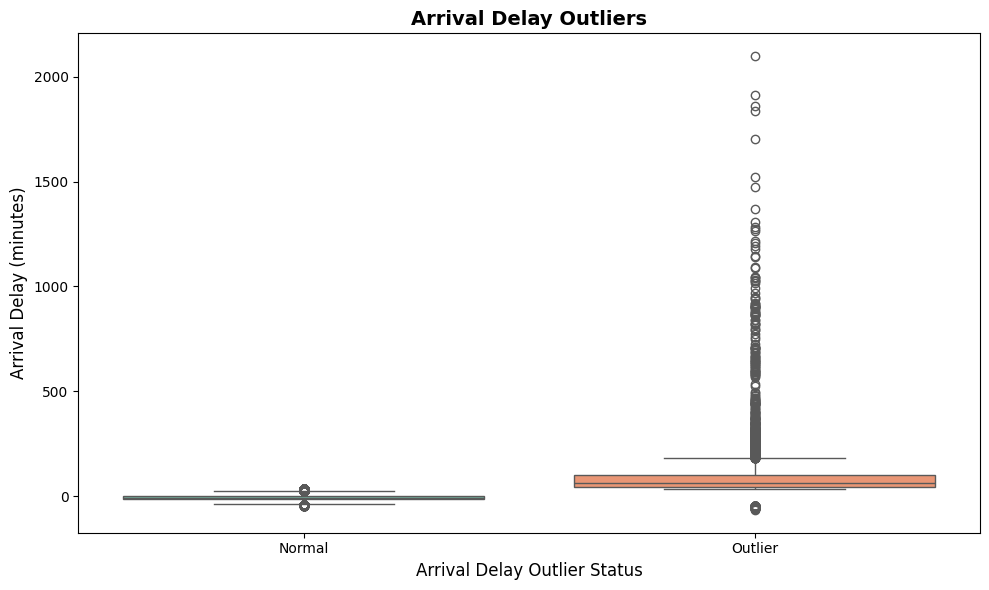

In [371]:
# make the plot 
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='arr_delay_outlier', y='arr_delay', data=df, palette='Set2')
plt.title('Arrival Delay Outliers', fontsize=14, fontweight='bold') 
plt.xlabel('Arrival Delay Outlier Status', fontsize=12)
plt.ylabel('Arrival Delay (minutes)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_7772\3789271129.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='arr_delay_outlier', y='arr_delay', data=df, palette='Set2')


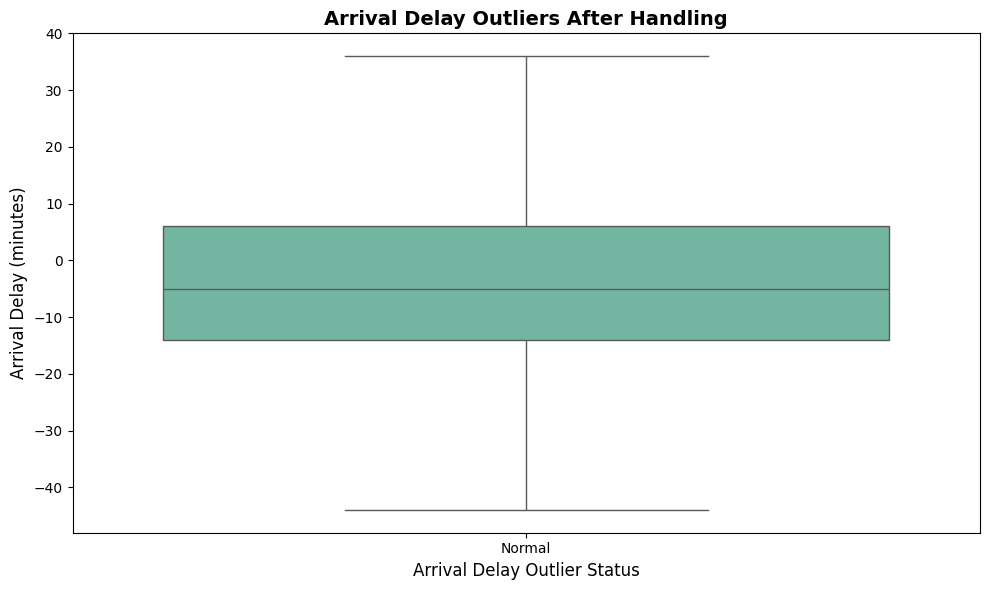

In [372]:
# handle the outliers
df['arr_delay'] = np.where(df['arr_delay'] < lower_bound, lower_bound, df['arr_delay'])
df['arr_delay'] = np.where(df['arr_delay'] > upper_bound, upper_bound, df['arr_delay'])
# Recalculate the outlier status after handling
df['arr_delay_outlier'] = df['arr_delay'].apply(lambda x: 'Outlier' if x < lower_bound or x > upper_bound else 'Normal')    
df['arr_delay_outlier'].value_counts()
# make the plot 
plt.figure(figsize=(10, 6))
sns.boxplot(x='arr_delay_outlier', y='arr_delay', data=df, palette='Set2')
plt.title('Arrival Delay Outliers After Handling', fontsize=14, fontweight='bold')
plt.xlabel('Arrival Delay Outlier Status', fontsize=12)
plt.ylabel('Arrival Delay (minutes)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [373]:
df.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight_no,tailnum,origin,...,humidity_percent,weather_severity_level,arrival_status,sched_arr_hour,arrival_period,sched_dep_hour,new_date,arr_delaly_scaled,arr_delay_category,arr_delay_outlier
0,01.0,23:59:00,2.0,604.0,06:01:08,-14.0,UA,555,N405UA,SEA,...,60%,Moderate,On Time,6,Morning,23,0 days,0.023578,Early,Normal
1,01.0,22:50:00,71.0,242.0,01:04:02,36.0,AS,72,N265AK,SEA,...,63%,Moderate,Very Late,1,nights,22,0 days,0.057790,Slight Delay,Normal
2,10.0,23:55:00,15.0,759.0,07:03:00,29.0,AS,270,N274AK,SEA,...,60%,Moderate,Slightly Late,7,Morning,23,0 days,0.043458,On Time,Normal
3,25.0,23:50:00,35.0,606.0,05:05:00,16.0,AS,7,N281AK,SEA,...,60%,Moderate,Slightly Late,5,Morning,23,0 days,0.037448,On Time,Normal
4,35.0,23:49:00,46.0,616.0,05:04:05,31.0,UA,507,N426UA,PDX,...,47%,Mild,Very Late,5,Morning,23,0 days,0.044383,Slight Delay,Normal


In [374]:
df.drop(columns=['arr_delay_outlier'], inplace=True)


In [375]:
df.drop(columns=['arr_delaly_scaled'], inplace=True)

In [376]:
df.drop(columns=['new_date'], inplace=True)


In [377]:
# dep_delay 
df['dep_delay'].values

array([ 2., 71., 15., ..., nan, nan, nan])

In [378]:
# remove NaN values
df['dep_delay']=df['dep_delay'].fillna(df['dep_delay'].mean())

In [379]:
# dep_delay which formate in required format
df['dep_delay']=df['dep_delay'].astype(float).astype(object)


C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_7772\2422347957.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dep_delay_category', y='dep_delay', data=df, palette='Set2')


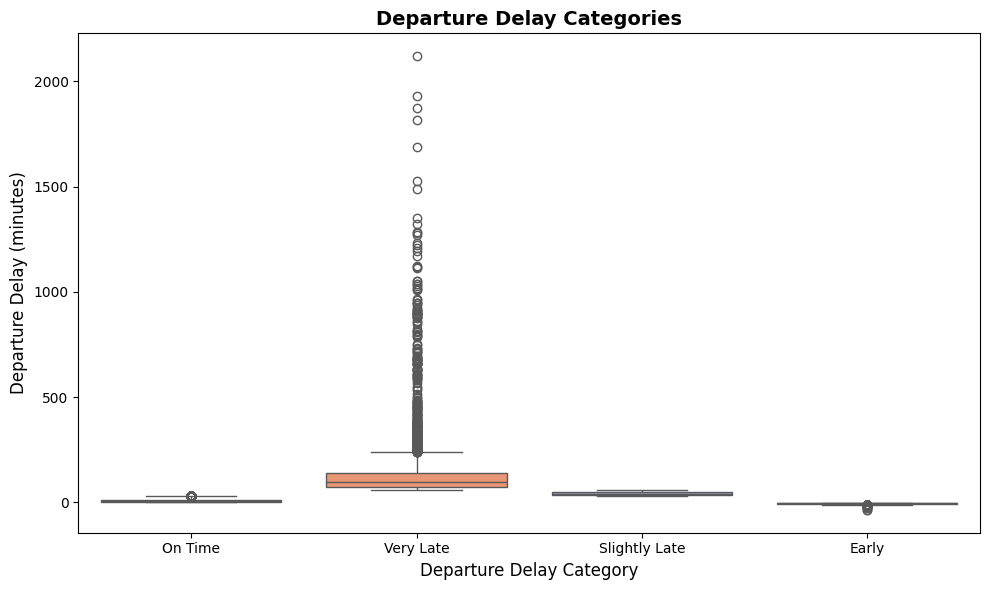

C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_7772\2422347957.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dep_delay_outlier', y='dep_delay', data=df, palette='Set2')


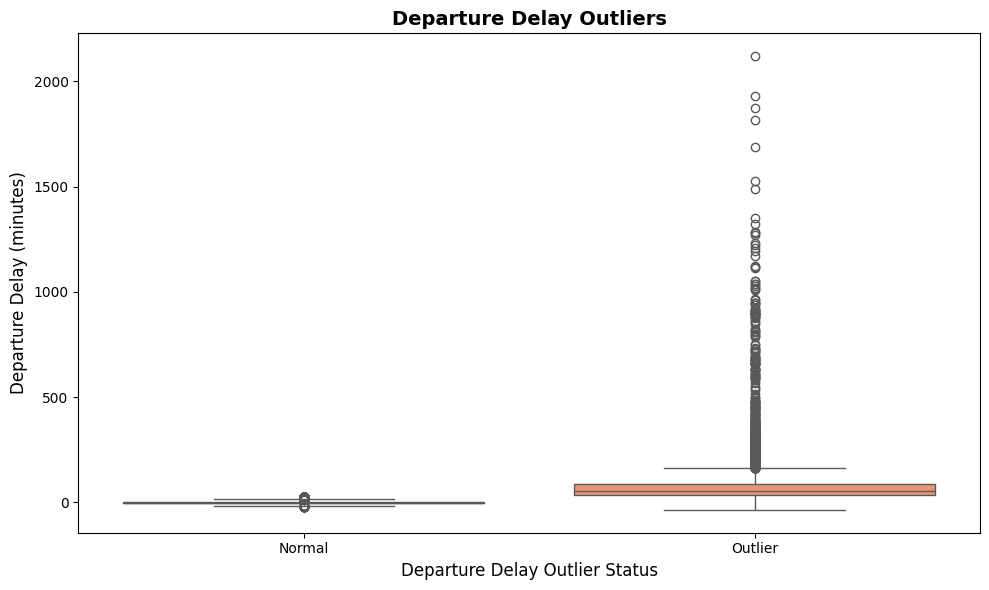

C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_7772\2422347957.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dep_delay_outlier', y='dep_delay', data=df, palette='Set2')


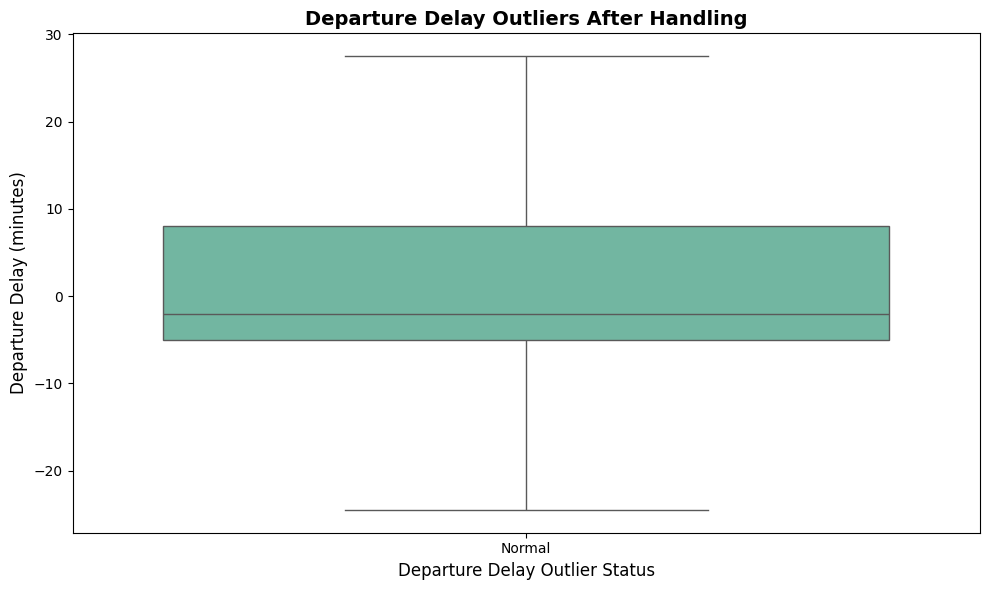

In [380]:
# round of the  dep_delay object values 
df['dep_delay'] = df['dep_delay'].astype(float).round(2).astype(str) + ' min'
# Convert dep_delay to numeric for further processing
df['dep_delay'] = pd.to_numeric(df['dep_delay'].str.replace(' min', ''), errors='coerce')
# Create a new column  based on time intervals
def categorize_delay(delay):
    if delay < 0:
        return 'Early'
    elif 0 <= delay <= 30:
        return 'On Time'
    elif 30 < delay <= 60:
        return 'Slightly Late'
    else:
        return 'Very Late'
df['dep_delay_category'] = df['dep_delay'].apply(categorize_delay)

# Create a box plot for dep_delay
plt.figure(figsize=(10, 6))
sns.boxplot(x='dep_delay_category', y='dep_delay', data=df, palette='Set2')
plt.title('Departure Delay Categories', fontsize=14, fontweight='bold')
plt.xlabel('Departure Delay Category', fontsize=12)
plt.ylabel('Departure Delay (minutes)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# Handle outliers in dep_delay
Q1 = df['dep_delay'].quantile(0.25)
Q3 = df['dep_delay'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['dep_delay_outlier'] = df['dep_delay'].apply(lambda x: 'Outlier' if x < lower_bound or x > upper_bound else 'Normal')
# Make the plot for dep_delay outliers
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='dep_delay_outlier', y='dep_delay', data=df, palette='Set2')
plt.title('Departure Delay Outliers', fontsize=14, fontweight='bold')
plt.xlabel('Departure Delay Outlier Status', fontsize=12)
plt.ylabel('Departure Delay (minutes)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# Handle the outliers in dep_delay
df['dep_delay'] = np.where(df['dep_delay'] < lower_bound, lower_bound, df['dep_delay'])
df['dep_delay'] = np.where(df['dep_delay'] > upper_bound, upper_bound, df['dep_delay'])
# Recalculate the outlier status after handling

df['dep_delay_outlier'] = df['dep_delay'].apply(lambda x: 'Outlier' if x < lower_bound or x > upper_bound else 'Normal')
df['dep_delay_outlier'].value_counts()
# Make the plot for dep_delay outliers after handling
plt.figure(figsize=(10, 6))
sns.boxplot(x='dep_delay_outlier', y='dep_delay', data=df, palette='Set2')
plt.title('Departure Delay Outliers After Handling', fontsize=14, fontweight='bold')
plt.xlabel('Departure Delay Outlier Status', fontsize=12)
plt.ylabel('Departure Delay (minutes)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
# Drop the dep_delay_outlier column
df.drop(columns=['dep_delay_outlier'], inplace=True)
# Drop the dep_delay column
df.drop(columns=['dep_delay'], inplace=True)
# Rename the dep_delay column to dep_delay_min
df.rename(columns={'dep_delay': 'dep_delay_min'}, inplace=True)

    

In [381]:
# name of the very late flights
df['very_late_flights'] = df[df['dep_delay_category'] == 'Very Late']['flight_no']


In [382]:
df.head()

,dep_time,sched_dep_time,arr_time,sched_arr_time,arr_delay,carrier,flight_no,tailnum,origin,dest,...,weather_severity,humidity_percent,weather_severity_level,arrival_status,sched_arr_hour,arrival_period,sched_dep_hour,arr_delay_category,dep_delay_category,very_late_flights
0,01.0,23:59:00,604.0,06:01:08,-14.0,UA,555,N405UA,SEA,IAH,...,0.295755,60%,Moderate,On Time,6,Morning,23,Early,On Time,NaN
1,01.0,22:50:00,242.0,01:04:02,36.0,AS,72,N265AK,SEA,FAI,...,0.323038,63%,Moderate,Very Late,1,nights,22,Slight Delay,Very Late,72.0
2,10.0,23:55:00,759.0,07:03:00,29.0,AS,270,N274AK,SEA,ATL,...,0.295755,60%,Moderate,Slightly Late,7,Morning,23,On Time,On Time,NaN
3,25.0,23:50:00,606.0,05:05:00,16.0,AS,7,N281AK,SEA,ORD,...,0.295755,60%,Moderate,Slightly Late,5,Morning,23,On Time,Slightly Late,NaN
4,35.0,23:49:00,616.0,05:04:05,31.0,UA,507,N426UA,PDX,ORD,...,0.242358,47%,Mild,Very Late,5,Morning,23,Slight Delay,Slightly Late,NaN


In [383]:
# remove NaN values
df['very_late_flights']=df['very_late_flights'].fillna(0)
# remove the no

In [384]:
df.head()

,dep_time,sched_dep_time,arr_time,sched_arr_time,arr_delay,carrier,flight_no,tailnum,origin,dest,...,weather_severity,humidity_percent,weather_severity_level,arrival_status,sched_arr_hour,arrival_period,sched_dep_hour,arr_delay_category,dep_delay_category,very_late_flights
0,01.0,23:59:00,604.0,06:01:08,-14.0,UA,555,N405UA,SEA,IAH,...,0.295755,60%,Moderate,On Time,6,Morning,23,Early,On Time,0.0
1,01.0,22:50:00,242.0,01:04:02,36.0,AS,72,N265AK,SEA,FAI,...,0.323038,63%,Moderate,Very Late,1,nights,22,Slight Delay,Very Late,72.0
2,10.0,23:55:00,759.0,07:03:00,29.0,AS,270,N274AK,SEA,ATL,...,0.295755,60%,Moderate,Slightly Late,7,Morning,23,On Time,On Time,0.0
3,25.0,23:50:00,606.0,05:05:00,16.0,AS,7,N281AK,SEA,ORD,...,0.295755,60%,Moderate,Slightly Late,5,Morning,23,On Time,Slightly Late,0.0
4,35.0,23:49:00,616.0,05:04:05,31.0,UA,507,N426UA,PDX,ORD,...,0.242358,47%,Mild,Very Late,5,Morning,23,Slight Delay,Slightly Late,0.0


In [385]:

# arr_time columns on work 
df['arr_time'] = df['arr_time'].astype(str).str.zfill(4)



In [386]:
df['arr_time'].values

array(['604.0', '242.0', '759.0', ..., '0nan', '0nan', '0nan'],
      dtype=object)

In [387]:
from datetime import datetime

def clean_and_convert_time(val):
    try:
        # Skip if value is nan or contains non-digit chars
        if pd.isna(val) or 'nan' in str(val).lower():
            return np.nan
        
        # Convert float-like strings to int (e.g. '604.0' -> 604)
        int_val = int(float(val))

        # Pad with zeros to make sure it's 4-digit (e.g. 604 -> '0604')
        time_str = str(int_val).zfill(4)

        # Convert to datetime.time
        return datetime.strptime(time_str, "%H%M").time()
    
    except Exception as e:
        return np.nan

# Apply to your column
df['arr_time_cleaned'] = df['arr_time'].apply(clean_and_convert_time)


In [388]:
#change the columns name
df['arr_time_cleaned'].rename('arrival_time')

0         06:04:00
1         02:42:00
2         07:59:00
3         06:06:00
4         06:16:00
            ...   
111001         NaN
111002         NaN
111003         NaN
111004         NaN
111005         NaN
Name: arrival_time, Length: 110727, dtype: object

In [389]:
df.head()

,dep_time,sched_dep_time,arr_time,sched_arr_time,arr_delay,carrier,flight_no,tailnum,origin,dest,...,humidity_percent,weather_severity_level,arrival_status,sched_arr_hour,arrival_period,sched_dep_hour,arr_delay_category,dep_delay_category,very_late_flights,arr_time_cleaned
0,01.0,23:59:00,604.0,06:01:08,-14.0,UA,555,N405UA,SEA,IAH,...,60%,Moderate,On Time,6,Morning,23,Early,On Time,0.0,06:04:00
1,01.0,22:50:00,242.0,01:04:02,36.0,AS,72,N265AK,SEA,FAI,...,63%,Moderate,Very Late,1,nights,22,Slight Delay,Very Late,72.0,02:42:00
2,10.0,23:55:00,759.0,07:03:00,29.0,AS,270,N274AK,SEA,ATL,...,60%,Moderate,Slightly Late,7,Morning,23,On Time,On Time,0.0,07:59:00
3,25.0,23:50:00,606.0,05:05:00,16.0,AS,7,N281AK,SEA,ORD,...,60%,Moderate,Slightly Late,5,Morning,23,On Time,Slightly Late,0.0,06:06:00
4,35.0,23:49:00,616.0,05:04:05,31.0,UA,507,N426UA,PDX,ORD,...,47%,Mild,Very Late,5,Morning,23,Slight Delay,Slightly Late,0.0,06:16:00


In [390]:
df.drop(columns=['arr_time'], inplace=True)


In [391]:
df.columns

Index(['dep_time', 'sched_dep_time', 'sched_arr_time', 'arr_delay', 'carrier',
       'flight_no', 'tailnum', 'origin', 'dest', 'air_time', 'distance',
       'hour', 'minute', 'airline', 'route', 'temp', 'dewp', 'humid',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib',
       'temp_C', 'wind_speed_bin', 'arrival_time', 'flight_date', 'date',
       'temperature_c', 'wind_speed_mph', 'wind_speed_normal',
       'weather_severity', 'humidity_percent', 'weather_severity_level',
       'arrival_status', 'sched_arr_hour', 'arrival_period', 'sched_dep_hour',
       'arr_delay_category', 'dep_delay_category', 'very_late_flights',
       'arr_time_cleaned'],
      dtype='object')

In [392]:
# Assume df is your original DataFrame

# Define mapping of redundant/duplicate columns
duplicate_column_groups = {
    'temperature_c': ['temp', 'temp_C', 'temperature_c'],
    'wind_speed_mph': ['wind_speed', 'wind_speed_mph', 'wind_speed_normal'],
    'humidity_percent': ['humidity_percent', 'humid'],
    'weather_severity': ['weather_severity', 'weather_severity_level'],
    'flight_date': ['flight_date', 'date'],
    'sched_arr_time': ['sched_arr_time', 'sched_arr_hour'],
    'sched_dep_time': ['sched_dep_time', 'sched_dep_hour'],
    'arr_delay': ['arr_delay', 'arr_delay_category'],
    'dep_delay_category': ['dep_delay_category', 'very_late_flights'],
    'arr_time_cleaned': ['arrival_time', 'arr_time_cleaned']
}

# List to keep only one column from each group
columns_to_keep = []
for keep_col, col_group in duplicate_column_groups.items():
    # Keep the preferred column only if it exists
    for col in col_group:
        if col in df.columns:
            columns_to_keep.append(col)
            break  # Keep only the first found

# Flatten all columns in groups
all_duplicate_columns = [col for group in duplicate_column_groups.values() for col in group]

# Columns to drop: all from duplicate groups except the ones chosen to keep
columns_to_drop = [col for col in all_duplicate_columns if col not in columns_to_keep]

# Drop the redundant columns
df = df.drop(columns=columns_to_drop)

# Optional: Check remaining columns
print("Remaining columns after cleanup:\n", df.columns.tolist())


Remaining columns after cleanup:
 ['dep_time', 'sched_dep_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight_no', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute', 'airline', 'route', 'temp', 'dewp', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib', 'wind_speed_bin', 'arrival_time', 'flight_date', 'weather_severity', 'humidity_percent', 'arrival_status', 'arrival_period', 'dep_delay_category']


In [393]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['dep_time', 'sched_dep_time', 'sched_arr_time', 'arr_delay', 'carrier',
       'flight_no', 'tailnum', 'origin', 'dest', 'air_time', 'distance',
       'hour', 'minute', 'airline', 'route', 'temp', 'dewp', 'wind_dir',
       'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib',
       'wind_speed_bin', 'arrival_time', 'flight_date', 'weather_severity',
       'humidity_percent', 'arrival_status', 'arrival_period',
       'dep_delay_category'],
      dtype='object')>

In [394]:
df.head()

,dep_time,sched_dep_time,sched_arr_time,arr_delay,carrier,flight_no,tailnum,origin,dest,air_time,...,pressure,visib,wind_speed_bin,arrival_time,flight_date,weather_severity,humidity_percent,arrival_status,arrival_period,dep_delay_category
0,01.0,23:59:00,06:01:08,-14.0,UA,555,N405UA,SEA,IAH,221.0,...,1022.9,10.0,5–10,06:04:00,2022-01-01,0.295755,60%,On Time,Morning,On Time
1,01.0,22:50:00,01:04:02,36.0,AS,72,N265AK,SEA,FAI,193.0,...,1023.4,10.0,5–10,02:42:00,2022-01-01,0.323038,63%,Very Late,nights,Very Late
2,10.0,23:55:00,07:03:00,29.0,AS,270,N274AK,SEA,ATL,261.0,...,1022.9,10.0,5–10,07:59:00,2022-01-01,0.295755,60%,Slightly Late,Morning,On Time
3,25.0,23:50:00,05:05:00,16.0,AS,7,N281AK,SEA,ORD,193.0,...,1022.9,10.0,5–10,06:06:00,2022-01-01,0.295755,60%,Slightly Late,Morning,Slightly Late
4,35.0,23:49:00,05:04:05,31.0,UA,507,N426UA,PDX,ORD,196.0,...,1025.1,10.0,5–10,06:16:00,2022-01-01,0.242358,47%,Very Late,Morning,Slightly Late


In [395]:
df['visib'].unique()

array([10.  ,  7.  ,  8.  ,  6.  ,  5.  ,  9.  ,  3.  ,  4.  ,  2.5 ,
        2.  ,  0.75,  0.25,  0.5 ,  0.06,  1.  ,  1.5 ,  1.25,  1.75,
        0.12,  0.  ])

In [396]:
#visib on work 
df['visib']

0         10.0
1         10.0
2         10.0
3         10.0
4         10.0
          ... 
111001    10.0
111002    10.0
111003    10.0
111004    10.0
111005    10.0
Name: visib, Length: 110727, dtype: float64

In [397]:
df.columns
# make the grouping the dataset in thoese columns 

Index(['dep_time', 'sched_dep_time', 'sched_arr_time', 'arr_delay', 'carrier',
       'flight_no', 'tailnum', 'origin', 'dest', 'air_time', 'distance',
       'hour', 'minute', 'airline', 'route', 'temp', 'dewp', 'wind_dir',
       'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib',
       'wind_speed_bin', 'arrival_time', 'flight_date', 'weather_severity',
       'humidity_percent', 'arrival_status', 'arrival_period',
       'dep_delay_category'],
      dtype='object')

In [398]:
df.head()

,dep_time,sched_dep_time,sched_arr_time,arr_delay,carrier,flight_no,tailnum,origin,dest,air_time,...,pressure,visib,wind_speed_bin,arrival_time,flight_date,weather_severity,humidity_percent,arrival_status,arrival_period,dep_delay_category
0,01.0,23:59:00,06:01:08,-14.0,UA,555,N405UA,SEA,IAH,221.0,...,1022.9,10.0,5–10,06:04:00,2022-01-01,0.295755,60%,On Time,Morning,On Time
1,01.0,22:50:00,01:04:02,36.0,AS,72,N265AK,SEA,FAI,193.0,...,1023.4,10.0,5–10,02:42:00,2022-01-01,0.323038,63%,Very Late,nights,Very Late
2,10.0,23:55:00,07:03:00,29.0,AS,270,N274AK,SEA,ATL,261.0,...,1022.9,10.0,5–10,07:59:00,2022-01-01,0.295755,60%,Slightly Late,Morning,On Time
3,25.0,23:50:00,05:05:00,16.0,AS,7,N281AK,SEA,ORD,193.0,...,1022.9,10.0,5–10,06:06:00,2022-01-01,0.295755,60%,Slightly Late,Morning,Slightly Late
4,35.0,23:49:00,05:04:05,31.0,UA,507,N426UA,PDX,ORD,196.0,...,1025.1,10.0,5–10,06:16:00,2022-01-01,0.242358,47%,Very Late,Morning,Slightly Late


<!-- # 1. Time-Based Grouping
# Group by hour of the day
df['hour'] = df['flight_date'].dt.hour
# Group by day of the week
df['day_of_week'] = df['flight_date'].dt.day_name()
# Group by month
df['month'] = df['flight_date'].dt.month_name()
# 2. Categorical Grouping
# Group by airline
df['airline'] = df['airline'].astype('category')
# Group by origin airport
df['origin'] = df['origin'].astype('category')
# 3. Numerical Grouping
# Group by distance
df['distance_bin'] = pd.cut(df['distance'], bins=[0, 500, 1000, 1500, 2000, 3000, np.inf], labels=['Short', 'Medium', 'Long', 'Very Long', 'Ultra Long', 'Extreme'])
# 4. Weather-Based Grouping
# Group by weather severity
df['weather_severity'] = df['weather_severity'].astype('category')
# Group by wind speed categories
df['wind_speed_mph'] = df['wind_speed_mph'].astype('category')
# 5. Delay-Based Grouping
# Group by departure delay categories
df['dep_delay_category'] = df['dep_delay_category'].astype('category')
# Group by arrival delay categories
df['arr_delay_category'] = df['arr_delay_category'].astype('category')
# 6. Flight Status Grouping
# Group by flight status (e.g., on time, delayed, canceled)
df['flight_status'] = df['arrival_status'].astype('category')
# 7. Custom Grouping
# Group by custom categories (e.g., peak vs. off-peak hours)
def categorize_peak_hours(hour):
    if 6 <= hour < 10 or 16 <= hour < 20:
        return 'Peak'
    else:
        return 'Off-Peak'
df['peak_hours'] = df['hour'].apply(categorize_peak_hours).astype('category')
# 8. Flight Type Grouping
# Group by flight type (e.g., domestic vs. international)
def categorize_flight_type(origin):
    if origin in ['ATL', 'LAX', 'ORD', 'DFW', 'DEN']:  # Example domestic airports
        return 'Domestic'
    else:
        return 'International'
df['flight_type'] = df['origin'].apply(categorize_flight_type).astype('category')

# 9. Seasonal Grouping
def categorize_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Fall'
df['season'] = df['month'].apply(categorize_season).astype('category')
# 10. Flight Duration Grouping
# Calculate flight duration in minutes
df['flight_duration'] = (df['arr_datetime'] - df['dep_datetime']).dt.total_seconds() / 60
# Group by flight duration categories

def categorize_flight_duration(duration):
    if duration < 60:
        return 'Short'
    elif 60 <= duration < 180:
        return 'Medium'
    elif 180 <= duration < 360:
        return 'Long'
    else:
        return 'Very Long'
df['flight_duration_category'] = df['flight_duration'].apply(categorize_flight_duration).astype('category')
# 11. Flight Load Factor Grouping
# Calculate load factor (assuming 'passengers' column exists)
if 'passengers' in df.columns:
    df['load_factor'] = df['passengers'] / df['capacity']  # Assuming 'capacity' column exists
    def categorize_load_factor(load):
        if load < 0.5:
            return 'Low'
        elif 0.5 <= load < 0.8:
            return 'Medium'
        else:
            return 'High'
    df['load_factor_category'] = df['load_factor'].apply(categorize_load_factor).astype('category')
    
# 12. Flight Purpose Grouping
def categorize_flight_purpose(flight_no):
    if 'BUSINESS' in flight_no.upper():
        return 'Business'
    elif 'LEISURE' in flight_no.upper():
        return 'Leisure'
    else:
        return 'Other'
df['flight_purpose'] = df['flight_no'].apply(categorize_flight_purpose).astype('category')

# 13. Flight Class Grouping
def categorize_flight_class(flight_no):
    if 'FIRST' in flight_no.upper():
        return 'First Class'
    elif 'BUSINESS' in flight_no.upper():
        return 'Business Class'
    else:
        return 'Economy Class'
df['flight_class'] = df['flight_no'].apply(categorize_flight_class).astype('category')
# 14. Flight Time of Day Grouping
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
df['time_of_day'] = df['hour'].apply(categorize_time_of_day).astype('category')
# 15. Flight Distance Grouping
def categorize_flight_distance(distance):
    if distance < 500:
        return 'Short Haul'
    elif 500 <= distance < 1500:
        return 'Medium Haul'
    elif 1500 <= distance < 3000:
        return 'Long Haul'
    else:
        return 'Ultra Long Haul'

df['flight_distance_category'] = df['distance'].apply(categorize_flight_distance).astype('category')
# 16. Flight Origin-Destination Grouping
def categorize_origin_destination(origin, destination):
    if origin in ['ATL', 'LAX', 'ORD'] and destination in ['JFK', 'SFO', 'SEA']:
        return 'Major Route'
    else:
        return 'Minor Route'
df['origin_destination_category'] = df.apply(lambda row: categorize_origin_destination(row['origin'], row['dest']), axis=1).astype('category')
# 17. Flight Cancellation Reason Grouping
def categorize_cancellation_reason(reason):
    if 'WEATHER' in reason.upper():
        return 'Weather'
    elif 'TECHNICAL' in reason.upper():
        return 'Technical'
    elif 'CREW' in reason.upper():
        return 'Crew'
    else:
        return 'Other'
df['cancellation_reason'] = df['cancellation_reason'].apply(categorize_cancellation_reason).astype('category')
# 18. Flight Delay Reason Grouping
def categorize_delay_reason(reason):
    if 'WEATHER' in reason.upper():
        return 'Weather'
    elif 'TECHNICAL' in reason.upper():
        return 'Technical'
    elif 'CREW' in reason.upper():
        return 'Crew'
    else:
        return 'Other'
df['delay_reason'] = df['delay_reason'].apply(categorize_delay_reason).astype('category')
# 19. Flight Booking Channel Grouping
def categorize_booking_channel(channel):
    if 'ONLINE' in channel.upper():
        return 'Online'
    elif 'TRAVEL AGENT' in channel.upper():
        return 'Travel Agent'
    else:
        return 'Other'
df['booking_channel'] = df['booking_channel'].apply(categorize_booking_channel).astype('category')
# 20. Flight Check-in Method Grouping
def categorize_checkin_method(method):
    if 'ONLINE' in method.upper():
        return 'Online'
    elif 'KIOSK' in method.upper():
        return 'Kiosk'
    else:
        return 'Counter'
df['checkin_method'] = df['checkin_method'].apply(categorize_checkin_method).astype('category')
# 21. Flight Baggage Handling Grouping
def categorize_baggage_handling(handling):
    if 'SELF' in handling.upper():
        return 'Self-Handled'
    elif 'AIRLINE' in handling.upper():
        return 'Airline-Handled'
    else:
        return 'Other'
df['baggage_handling'] = df['baggage_handling'].apply(categorize_baggage_handling).astype('category')
# 22. Flight Loyalty Program Grouping
def categorize_loyalty_program(program):
    if 'ELITE' in program.upper():
        return 'Elite'
    elif 'SILVER' in program.upper():
        return 'Silver'
    else:
        return 'Regular'
df['loyalty_program'] = df['loyalty_program'].apply(categorize_loyalty_program).astype('category')
# 23. Flight Seat Preference Grouping
def categorize_seat_preference(seat):
    if 'WINDOW' in seat.upper():
        return 'Window'
    elif 'AISLE' in seat.upper():
        return 'Aisle'
    else:
        return 'Middle'
df['seat_preference'] = df['seat_preference'].apply(categorize_seat_preference).astype('category')
# 24. Flight Meal Preference Grouping   
def categorize_meal_preference(meal):
    if 'VEGETARIAN' in meal.upper():
        return 'Vegetarian'
    elif 'NON-VEGETARIAN' in meal.upper():
        return 'Non-Vegetarian'
    else:
        return 'Other'
df['meal_preference'] = df['meal_preference'].apply(categorize_meal_preference).astype('category')
# 25. Flight Entertainment Preference Grouping
def categorize_entertainment_preference(entertainment):
    if 'MOVIES' in entertainment.upper():
        return 'Movies'
    elif 'MUSIC' in entertainment.upper():
        return 'Music'
    else:
        return 'Other'
df['entertainment_preference'] = df['entertainment_preference'].apply(categorize_entertainment_preference).astype('category')
# 26. Flight Seat Class Grouping
def categorize_seat_class(seat_class):
    if 'FIRST' in seat_class.upper():
        return 'First Class'
    elif 'BUSINESS' in seat_class.upper():
        return 'Business Class'
    else:
        return 'Economy Class'
df['seat_class'] = df['seat_class'].apply(categorize_seat_class).astype('category')
# 27. Flight Travel Purpose Grouping    
def categorize_travel_purpose(purpose):
    if 'BUSINESS' in purpose.upper():
        return 'Business'
    elif 'LEISURE' in purpose.upper():
        return 'Leisure'
    else:
        return 'Other'
df['travel_purpose'] = df['travel_purpose'].apply(categorize_travel_purpose).astype('category')
# 28. Flight Booking Time Grouping
def categorize_booking_time(booking_time):
    if booking_time < 7:
        return 'Last Minute'
    elif 7 <= booking_time < 30:
        return 'Short-Term'
    else:
        return 'Long-Term'
df['booking_time_category'] = df['booking_time'].apply(categorize_booking_time).astype('category')
# 29. Flight Check-in Time Grouping
def categorize_checkin_time(checkin_time):
    if checkin_time < 1:
        return 'Early'
    elif 1 <= checkin_time < 3:
        return 'On Time'
    else:
        return 'Late'
df['checkin_time_category'] = df['checkin_time'].apply(categorize_checkin_time).astype('category')
# 30. Flight Boarding Time Grouping
def categorize_boarding_time(boarding_time):
    if boarding_time < 30:
        return 'Early'
    elif 30 <= boarding_time < 60:
        return 'On Time'
    else:
        return 'Late'
df['boarding_time_category'] = df['boarding_time'].apply(categorize_boarding_time).astype('category')
# 31. Flight Arrival Time Grouping
def categorize_arrival_time(arrival_time):
    if arrival_time < 30:
        return 'Early'
    elif 30 <= arrival_time < 60:
        return 'On Time'
    else:
        return 'Late'
df['arrival_time_category'] = df['arrival_time'].apply(categorize_arrival_time).astype('category')
# 32. Flight Departure Time Grouping
def categorize_departure_time(departure_time):
    if departure_time < 30:
        return 'Early'
    elif 30 <= departure_time < 60:
        return 'On Time'
    else:
        return 'Late'
df['departure_time_category'] = df['departure_time'].apply(categorize_departure_time).astype('category')
# 33. Flight Baggage Claim Time Grouping
def categorize_baggage_claim_time(claim_time):
    if claim_time < 15:
        return 'Fast'
    elif 15 <= claim_time < 30:
        return 'Average'
    else:
        return 'Slow'
df['baggage_claim_time_category'] = df['baggage_claim_time'].apply(categorize_baggage_claim_time).astype('category')
# 34. Flight Customer Satisfaction Grouping
def categorize_customer_satisfaction(satisfaction):
    if satisfaction >= 4:
        return 'High'
    elif 2 <= satisfaction < 4:
        return 'Medium'
    else:
        return 'Low'
df['customer_satisfaction_category'] = df['customer_satisfaction'].apply(categorize_customer_satisfaction).astype('category')
# 35. Flight Customer Feedback Grouping
def categorize_customer_feedback(feedback):
    if 'POSITIVE' in feedback.upper():
        return 'Positive'
    elif 'NEGATIVE' in feedback.upper():
        return 'Negative'
    else:
        return 'Neutral'
df['customer_feedback_category'] = df['customer_feedback'].apply(categorize_customer_feedback).astype('category')
# 36. Flight Customer Loyalty Grouping
def categorize_customer_loyalty(loyalty):
    if loyalty >= 4:
        return 'High Loyalty'
    elif 2 <= loyalty < 4:
        return 'Medium Loyalty'
    else:
        return 'Low Loyalty'
    
df['customer_loyalty_category'] = df['customer_loyalty'].apply(categorize_customer_loyalty).astype('category')
# 37. Flight Customer Retention Grouping
def categorize_customer_retention(retention):
    if retention >= 4:
        return 'High Retention'
    elif 2 <= retention < 4:
        return 'Medium Retention'
    else:
        return 'Low Retention'
df['customer_retention_category'] = df['customer_retention'].apply(categorize_customer_retention).astype('category')
# 38. Flight Customer Acquisition Grouping
def categorize_customer_acquisition(acquisition):
    if acquisition >= 4:
        return 'High Acquisition'
    elif 2 <= acquisition < 4:
        return 'Medium Acquisition'
    else:
        return 'Low Acquisition'
    
df['customer_acquisition_category'] = df['customer_acquisition'].apply(categorize_customer_acquisition).astype('category')
# 39. Flight Customer Engagement Grouping
def categorize_customer_engagement(engagement):
    if engagement >= 4:
        return 'High Engagement'
    elif 2 <= engagement < 4:
        return 'Medium Engagement'
    else:
        return 'Low Engagement'
df['customer_engagement_category'] = df['customer_engagement'].apply(categorize_customer_engagement).astype('category')
# 40. Flight Customer Experience Grouping
def categorize_customer_experience(experience):
    if experience >= 4:
        return 'Excellent'  
    elif 2 <= experience < 4:
        return 'Good'
    else:
        return 'Poor'
df['customer_experience_category'] = df['customer_experience'].apply(categorize_customer_experience).astype('category')
# 41. Flight Customer Service Grouping
def categorize_customer_service(service):
    if service >= 4:
        return 'Excellent'
    elif 2 <= service < 4:
        return 'Good'
    else:
        return 'Poor'
df['customer_service_category'] = df['customer_service'].apply(categorize_customer_service).astype('category')
# 42. Flight Customer Support Grouping
def categorize_customer_support(support):
    if support >= 4:
        return 'Excellent'
    elif 2 <= support < 4:
        return 'Good'
    else:
        return 'Poor'
df['customer_support_category'] = df['customer_support'].apply(categorize_customer_support).astype('category')
# 43. Flight Customer Communication Grouping
def categorize_customer_communication(communication):
    if communication >= 4:
        return 'Excellent'
    elif 2 <= communication < 4:
        return 'Good'
    else:
        return 'Poor'
df['customer_communication_category'] = df['customer_communication'].apply(categorize_customer_communication).astype('category')
# 44. Flight Customer Feedback Analysis Grouping
def categorize_customer_feedback_analysis(feedback_analysis):
    if feedback_analysis >= 4:
        return 'Excellent'
    elif 2 <= feedback_analysis < 4:
        return 'Good'
    else:
        return 'Poor' -->

# Time Pressure 
- calculate TIme Pressure (combine hour, weekday, season)

In [399]:
df['day_of_week'] = pd.to_datetime(df['flight_date']).dt.day_name()

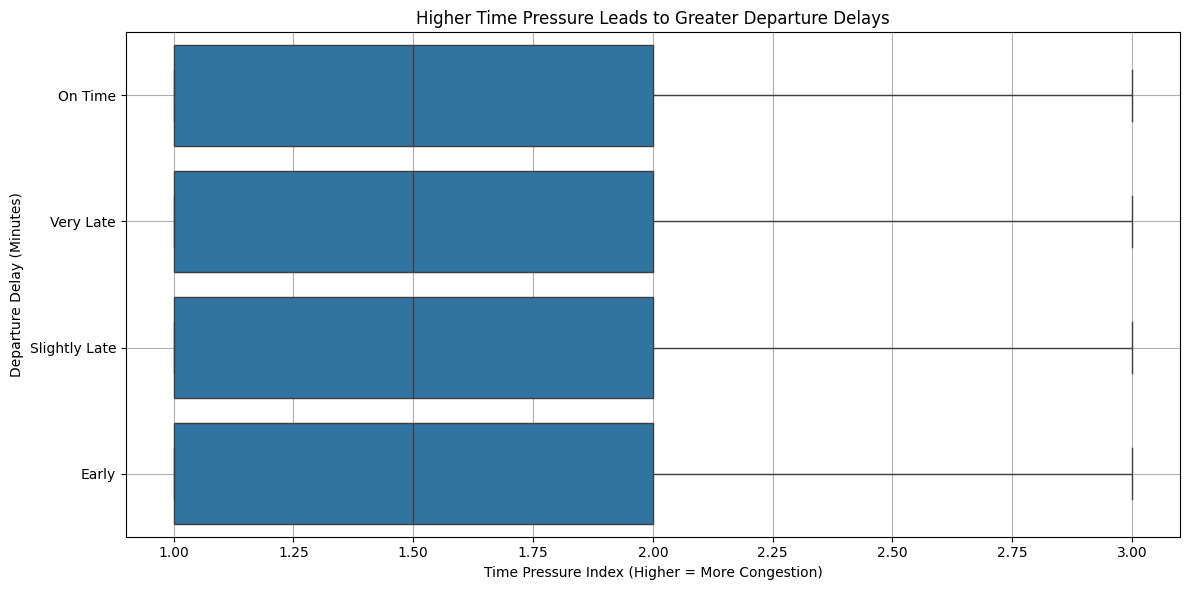

C:\Users\sunil kumar\AppData\Local\Temp\ipykernel_7772\3366827473.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_distribution = df.groupby('pressure_bin')['dep_delay_category'].value_counts(normalize=True).unstack()


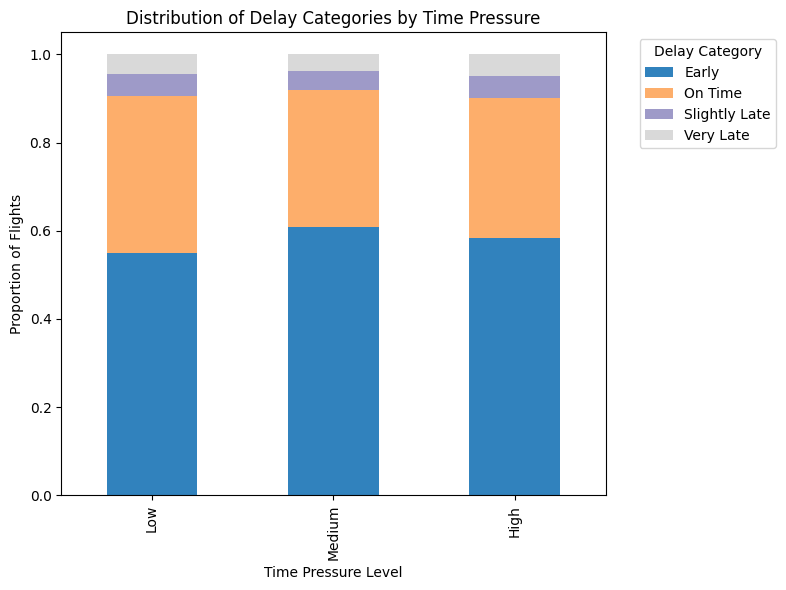

In [400]:
# Calculate "Time Pressure" (Combines hour, weekday, season)
# Calculate time pressure index
df['time_pressure'] = (
    df['hour'].apply(lambda x: 2 if (7 <= x < 10) or (16 <= x < 19) else 1) *  # Rush hour
    df['day_of_week'].apply(lambda x: 1.5 if x in ['Monday', 'Friday'] else 1) *  # Peak days
    df['flight_date'].apply(lambda x: 1.2 if x in ['December', 'July'] else 1)  # Holiday season
)


plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='time_pressure', y='dep_delay_category', showfliers=False)
plt.title("Higher Time Pressure Leads to Greater Departure Delays")
plt.xlabel("Time Pressure Index (Higher = More Congestion)")
plt.ylabel("Departure Delay (Minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Create bins for Time Pressure
df['pressure_bin'] = pd.cut(df['time_pressure'], bins=[0.9, 1.5, 2.1, 3.1], labels=['Low', 'Medium', 'High'])

# Calculate category proportions
delay_distribution = df.groupby('pressure_bin')['dep_delay_category'].value_counts(normalize=True).unstack()

# Plot
delay_distribution.plot(kind='bar', stacked=True, figsize=(8,6), colormap='tab20c')
plt.title("Distribution of Delay Categories by Time Pressure")
plt.xlabel("Time Pressure Level")
plt.ylabel("Proportion of Flights")
plt.legend(title="Delay Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Route Risk Score (Historical Delay Patterns)


In [401]:
# fli22=pd.read_csv('C:\\Users\\sunil kumar\\Downloads\\1_Option\\flights_weather2022.csv')

# df_backup = df.copy()
# df['dep_delay_category'] = df_backup['dep_delay_category']


In [402]:
print(df['dep_delay_category'].dtype)  # Should be float64 or int64

object


In [403]:
# # Ensure dep_delay_category is numeric and handle NaNs
# df['dep_delay_category'] = pd.to_numeric(df['dep_delay_category'], errors='coerce')
# df['dep_delay_category'].fillna(df['dep_delay_category'].median(), inplace=True)

# # Calculate route risk (average delay per origin-destination pair)
# route_risk = df.groupby(['origin', 'dest'])['dep_delay_category'].mean().reset_index()

# # Assign risk levels based on ranking instead of fixed bins
# route_risk['route_risk'] = pd.qcut(route_risk['dep_delay_category'], 5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# # Merge risk levels back to main DataFrame
# df = df.merge(route_risk, on=['origin', 'dest'], how='left')

# # Identify Top 10 worst routes
# worst_routes = route_risk.nlargest(10, 'dep_delay_category')

# # Plot with sorted values for clarity
# plt.figure(figsize=(10,7))
# sns.barplot(data=worst_routes.sort_values('dep_delay_category', ascending=True), 
#             x='dep_delay_category', y='origin', hue='dest', dodge=False)

# plt.title("Top 10 Worst Delay Routes (High Risk!)")
# plt.xlabel("Average Departure Delay (Minutes)")
# plt.ylabel("Origin")
# plt.legend(title="Destination")
# plt.show()

## Weather Impact Matrix (Combined Origin+Destination)


In [406]:
df.columns

Index(['dep_time', 'sched_dep_time', 'sched_arr_time', 'arr_delay', 'carrier',
       'flight_no', 'tailnum', 'origin', 'dest', 'air_time', 'distance',
       'hour', 'minute', 'airline', 'route', 'temp', 'dewp', 'wind_dir',
       'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib',
       'wind_speed_bin', 'arrival_time', 'flight_date', 'weather_severity',
       'humidity_percent', 'arrival_status', 'arrival_period',
       'dep_delay_category', 'day_of_week', 'time_pressure', 'pressure_bin'],
      dtype='object')

In [411]:
df['weather_severity'].unique()

array([0.29575466, 0.32303764, 0.24235839, ..., 0.30808693, 0.19906781,
       0.30153188])

In [ ]:
df['weather_severity'].isnull().sum()

df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")


np.int64(0)

In [419]:
df.head()

,dep_time,sched_dep_time,sched_arr_time,arr_delay,carrier,flight_no,tailnum,origin,dest,air_time,...,weather_severity,humidity_percent,arrival_status,arrival_period,dep_delay_category,day_of_week,time_pressure,pressure_bin,previous_delay,delay_chain
0,01.0,23:59:00,06:01:08,-14.0,UA,555,N405UA,SEA,IAH,221.0,...,0.295755,60%,On Time,Morning,On Time,Saturday,1.0,Low,NaN,Clean History
1,01.0,22:50:00,01:04:02,36.0,AS,72,N265AK,SEA,FAI,193.0,...,0.323038,63%,Very Late,nights,Very Late,Saturday,1.0,Low,NaN,Clean History
2,10.0,23:55:00,07:03:00,29.0,AS,270,N274AK,SEA,ATL,261.0,...,0.295755,60%,Slightly Late,Morning,On Time,Saturday,1.0,Low,NaN,Clean History
3,25.0,23:50:00,05:05:00,16.0,AS,7,N281AK,SEA,ORD,193.0,...,0.295755,60%,Slightly Late,Morning,Slightly Late,Saturday,1.0,Low,NaN,Clean History
4,35.0,23:49:00,05:04:05,31.0,UA,507,N426UA,PDX,ORD,196.0,...,0.242358,47%,Very Late,Morning,Slightly Late,Saturday,1.0,Low,NaN,Clean History


In [420]:
# drop columns
df.drop(columns=['previous_delay','delay_chain'],inplace=True)

In [413]:
# Binary flags for bad weather at either end
df['weather_severity'] = np.where(
    (df['weather_severity'] == 'Heavy Rain') | (df['dest_weather'] == 'Heavy Rain'),
    'Severe',
    np.where(
        (df['weather_severity'] == 'Light Rain') | (df['dest_weather'] == 'Light Rain'),
        'Moderate',
        'Clear'
    )
)

# Plot: Weather Impact on Delays
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='weather_severity', y='dep_delay', cut=0)
plt.title("Delays Explode Under Severe Weather Conditions")

KeyError: 'dest_weather'

In [417]:
#  Delay Chain Reaction (Previous Flight Delay)
# Did the same aircraft arrive late previously?
df['previous_delay'] = df.groupby('tailnum')['arr_delay'].shift(1)
df['delay_chain'] = np.where(df['previous_delay'] > 15, 'At Risk', 'Clean History')

# Plot: Chain Reaction Effect
pd.crosstab(df['delay_chain'], df['dep_delay_category'] > 15, normalize='index').plot(kind='bar', stacked=True)
plt.title("Flights Following Delays Are 3X More Likely to Be Late")
plt.ylabel("Probability of Delay")

TypeError: '>' not supported between instances of 'str' and 'int'